In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# Set random seed
np.random.seed(42)

In [97]:
def cat_plot(data, cat_features):
    # Plot barplots
    fig = plt.figure(figsize=(10,20))
    gs = gridspec.GridSpec(5,2)
    ax = {}

    for ftr, i in zip(cat_features, range(len(cat_features))):
        ax[i] = fig.add_subplot(gs[i])
        ax[i] = sns.countplot(data, x=ftr)
        ax[i].set_xticklabels(ax[i].get_xticklabels()) #, rotation=40, ha="right")
        ax[i].set_xlabel(cat_features[i])
    plt.tight_layout()
    plt.show()

def num_plot(X):
    # Plot histograms
    X.hist(figsize=(20, 15))
    plt.suptitle("Histograms of the Attributes", fontsize=20)
    plt.show()

    # Plot boxplots
    X.boxplot(figsize=(6, 10))
    plt.title("Boxplot of the Attributes")
    plt.show()

    # Plot pairwise scatterplots
    sns.pairplot(X, corner=True)
    plt.suptitle("Pairwise Scatterplots", fontsize=20)
    plt.show()

    # Heatmap of cross correlations
    sns.heatmap(X.corr(numeric_only=False))
    plt.title("Heatmap")
    plt.show()

# 1. Loading the Data, Preprocessing, Initial Data Analysis

In [98]:
# Load the dataset
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url_data)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [99]:
# Describe the dataframe
df.describe()

# Number of distinct elements per column
#df.nunique()

# Check for NaNs
#df.isnull().values.any()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [100]:
# get new columns, cat and num cols
dtype = df.dtypes
cat_features = ["Channel", "Region"] #df[["Channel", "Region"]]
num_features = df.drop(columns=["Channel", "Region"]).columns.tolist()

print("Nominal features:", cat_features)
print("Numerical features:", num_features)

Nominal features: ['Channel', 'Region']
Numerical features: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


### Basic statistical visualisations of the data

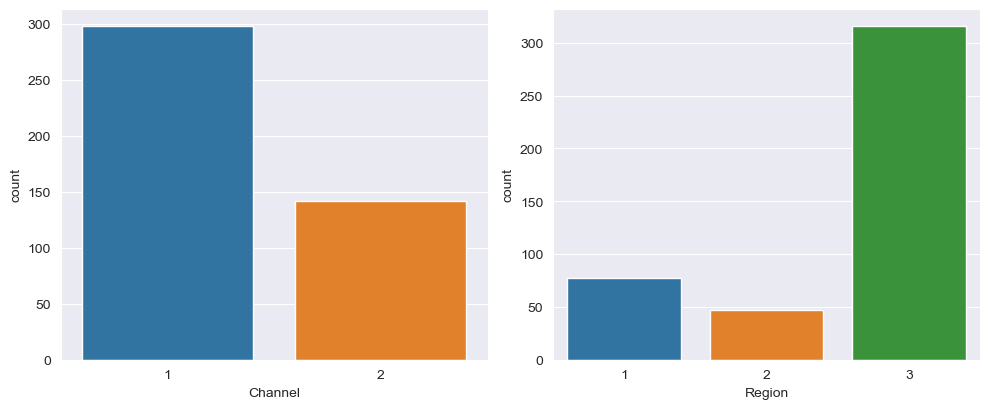

In [101]:
# Plot distributions of attributes: NOMINAL (barplots)
cat_plot(df, cat_features)

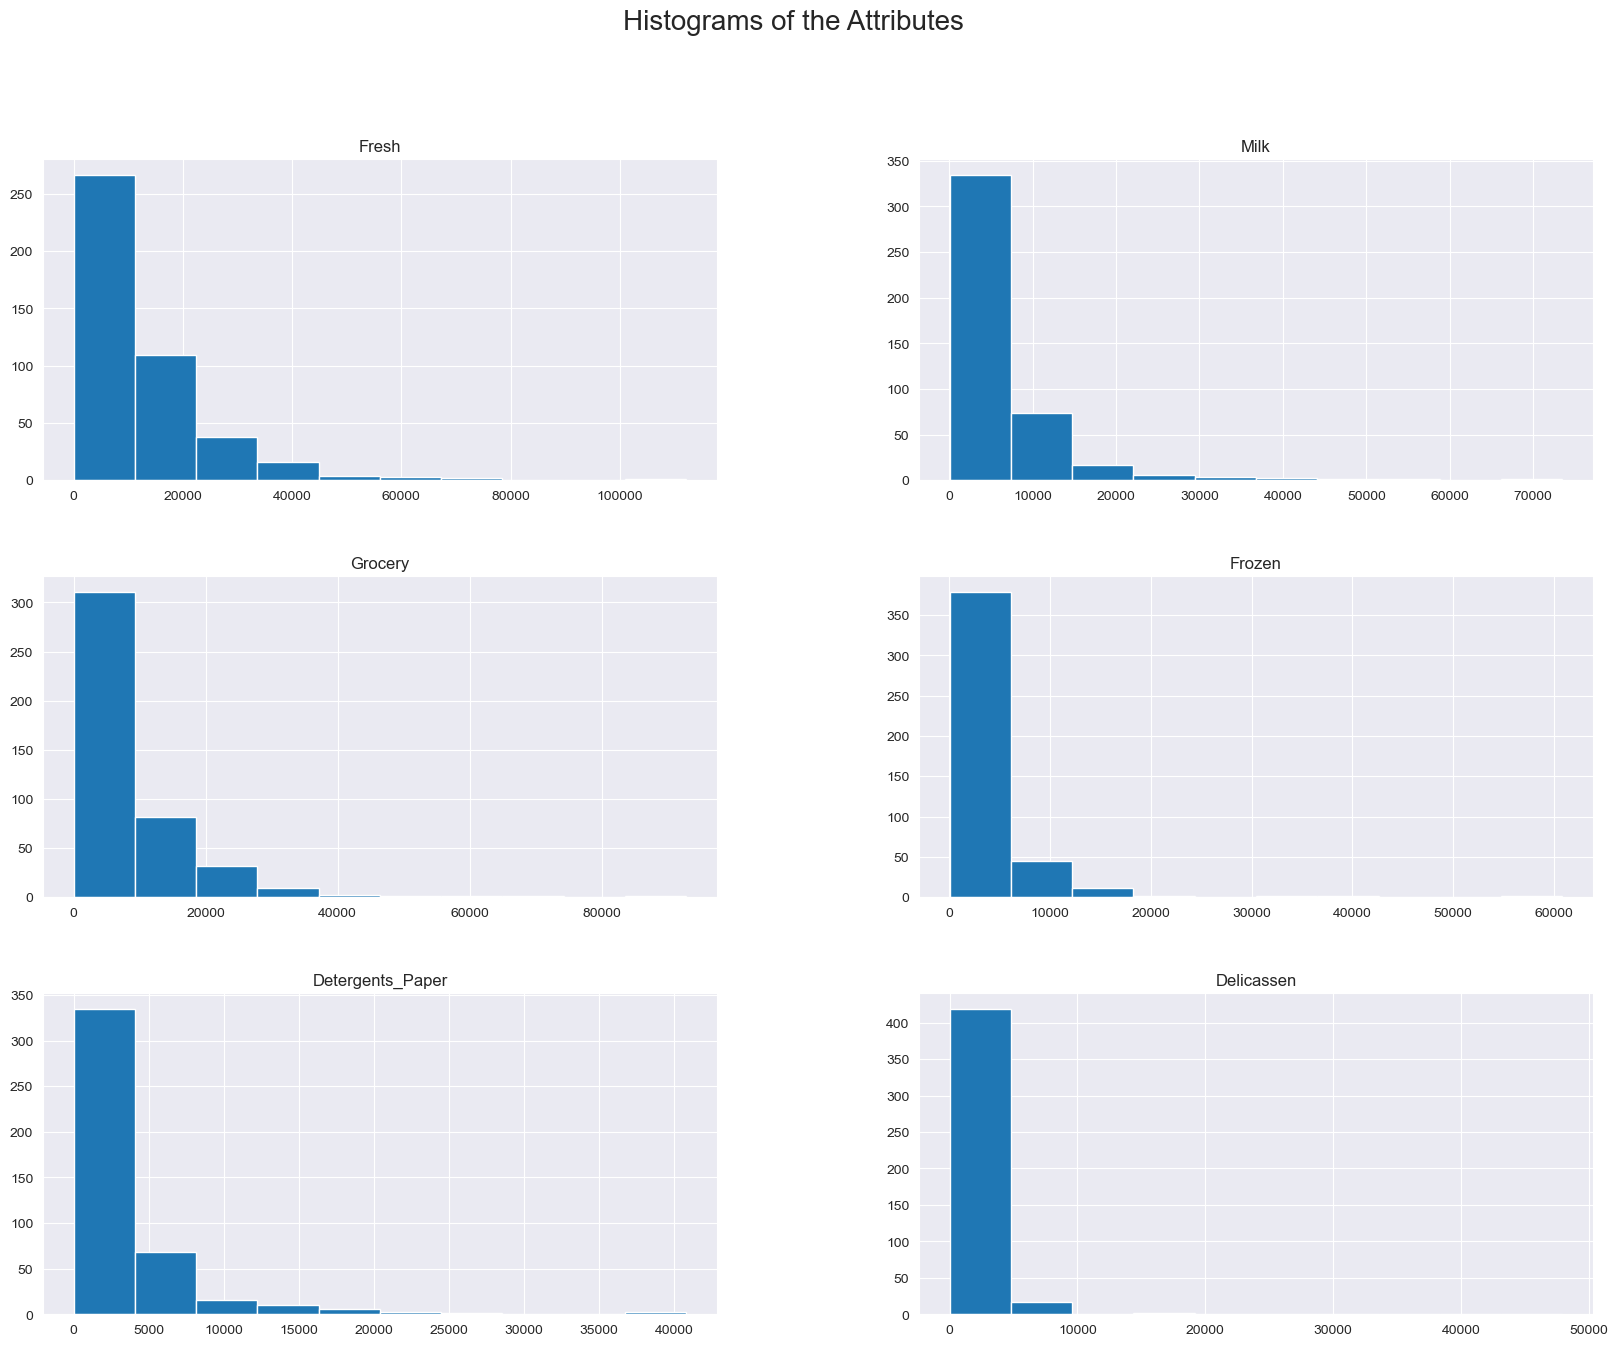

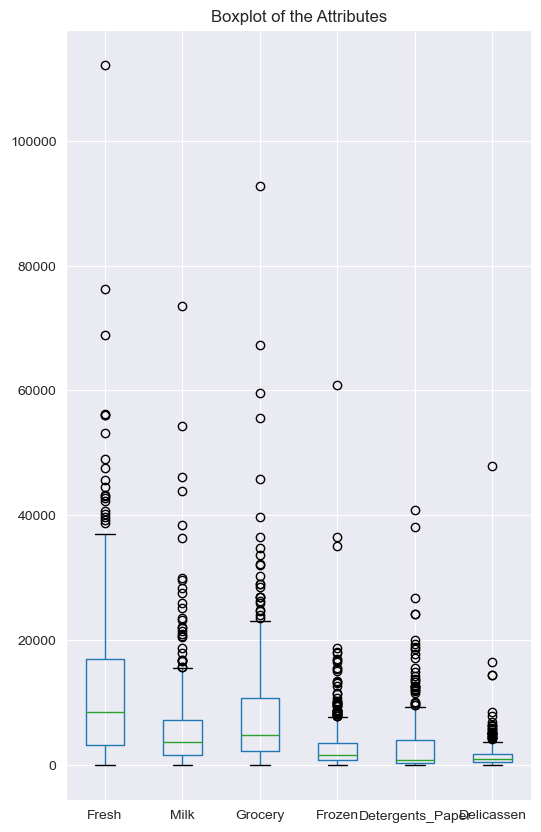

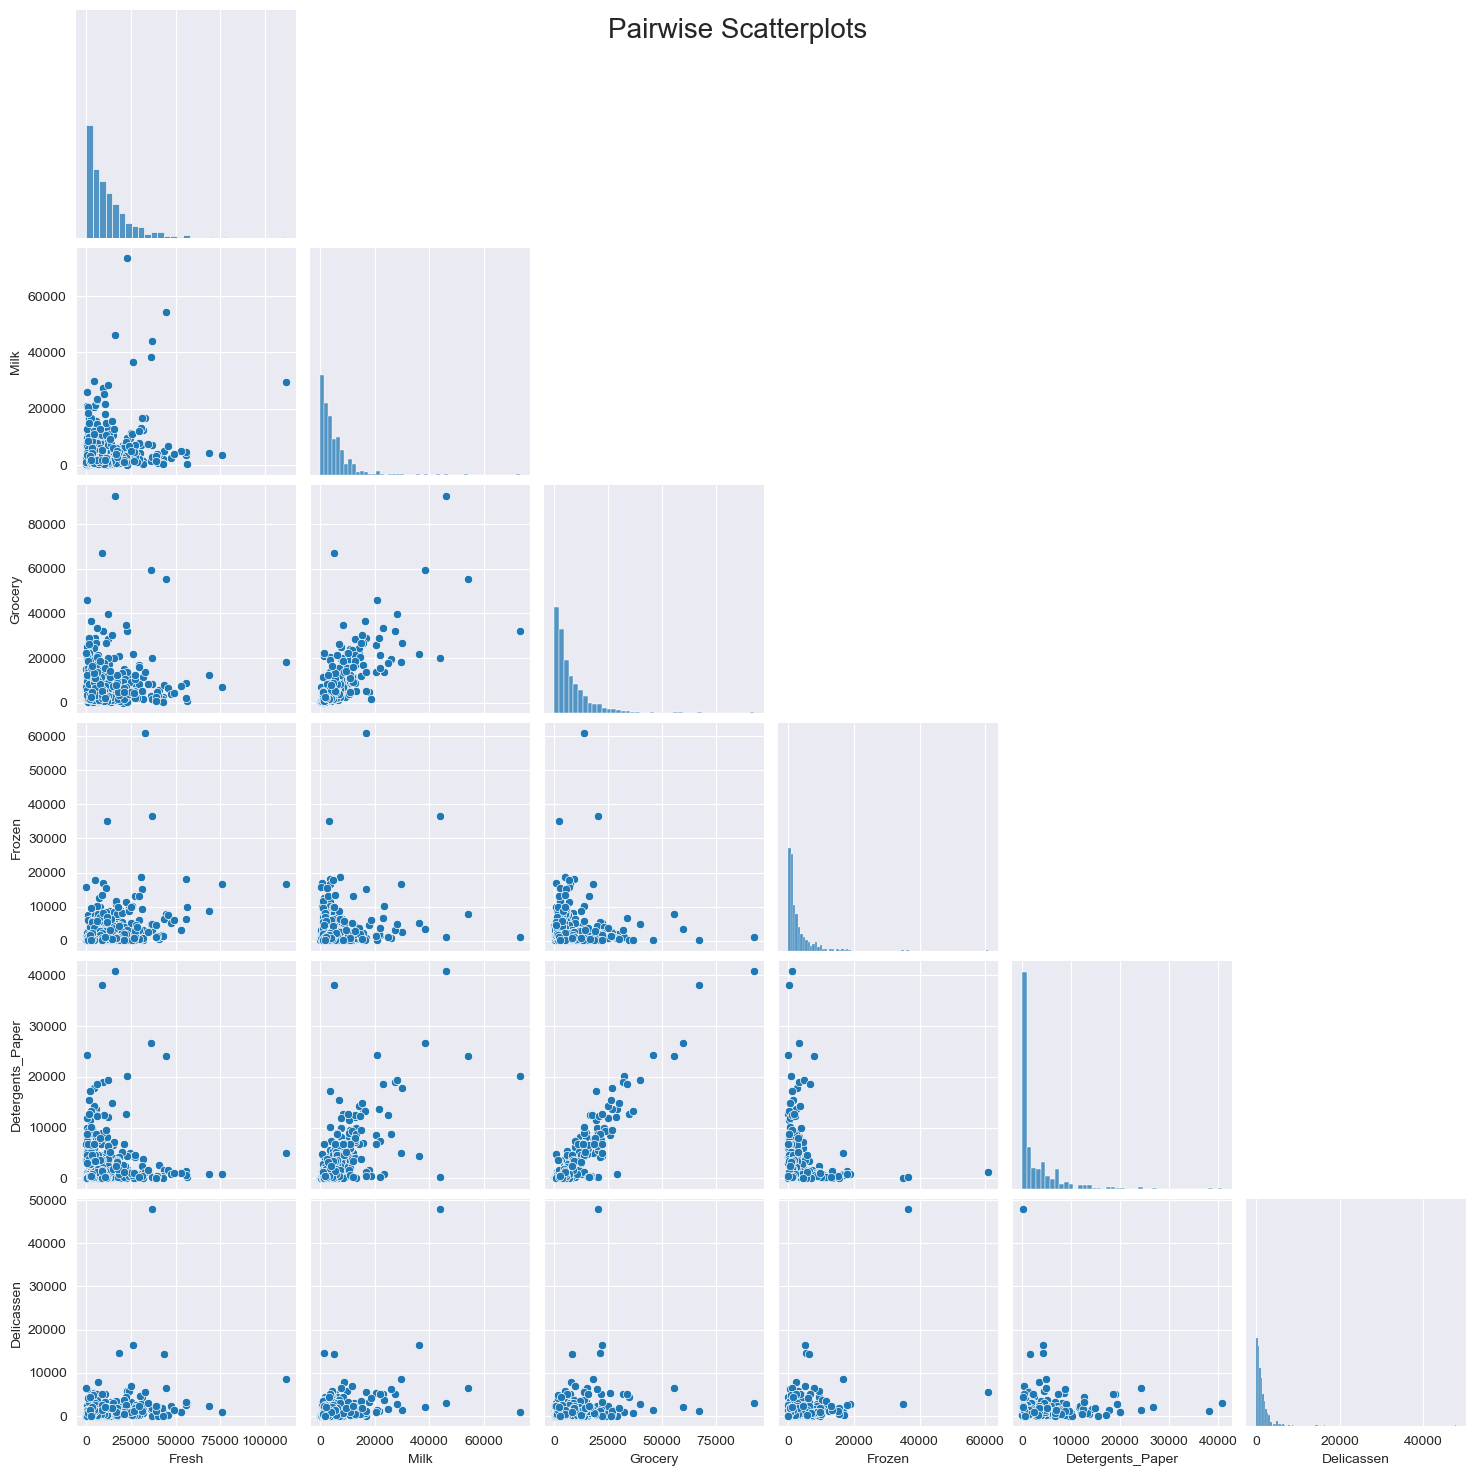

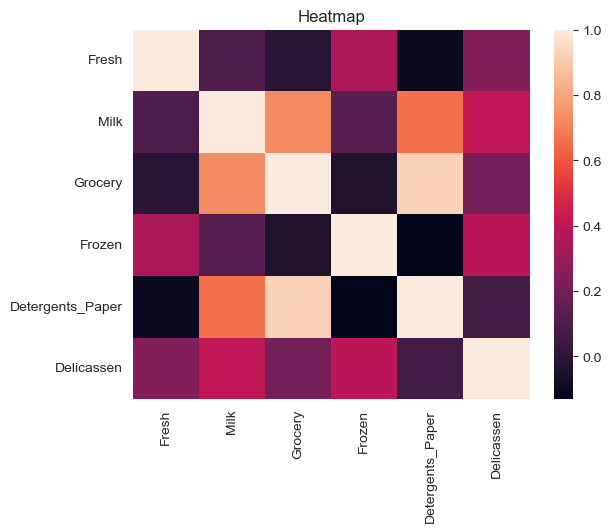

In [102]:
# Plot distributions of attributes: NUMERICAL (histograms, boxplot)
# Plot correlations (pairwise scatterplots and heatmap)
num_plot(df[num_features])

### Observation: the distributions are heavy tailed -> apply the log function to the continuous features so that the distribution becomes compressed for large values and expanded for small values

In [103]:
# Drop meta-data: Channel and the Region indicators
df_num = df.drop(columns=cat_features)

# x ← log(x + 1)
df_num = df_num.transform(lambda x: np.log(x + 1))

### Recomputed plots

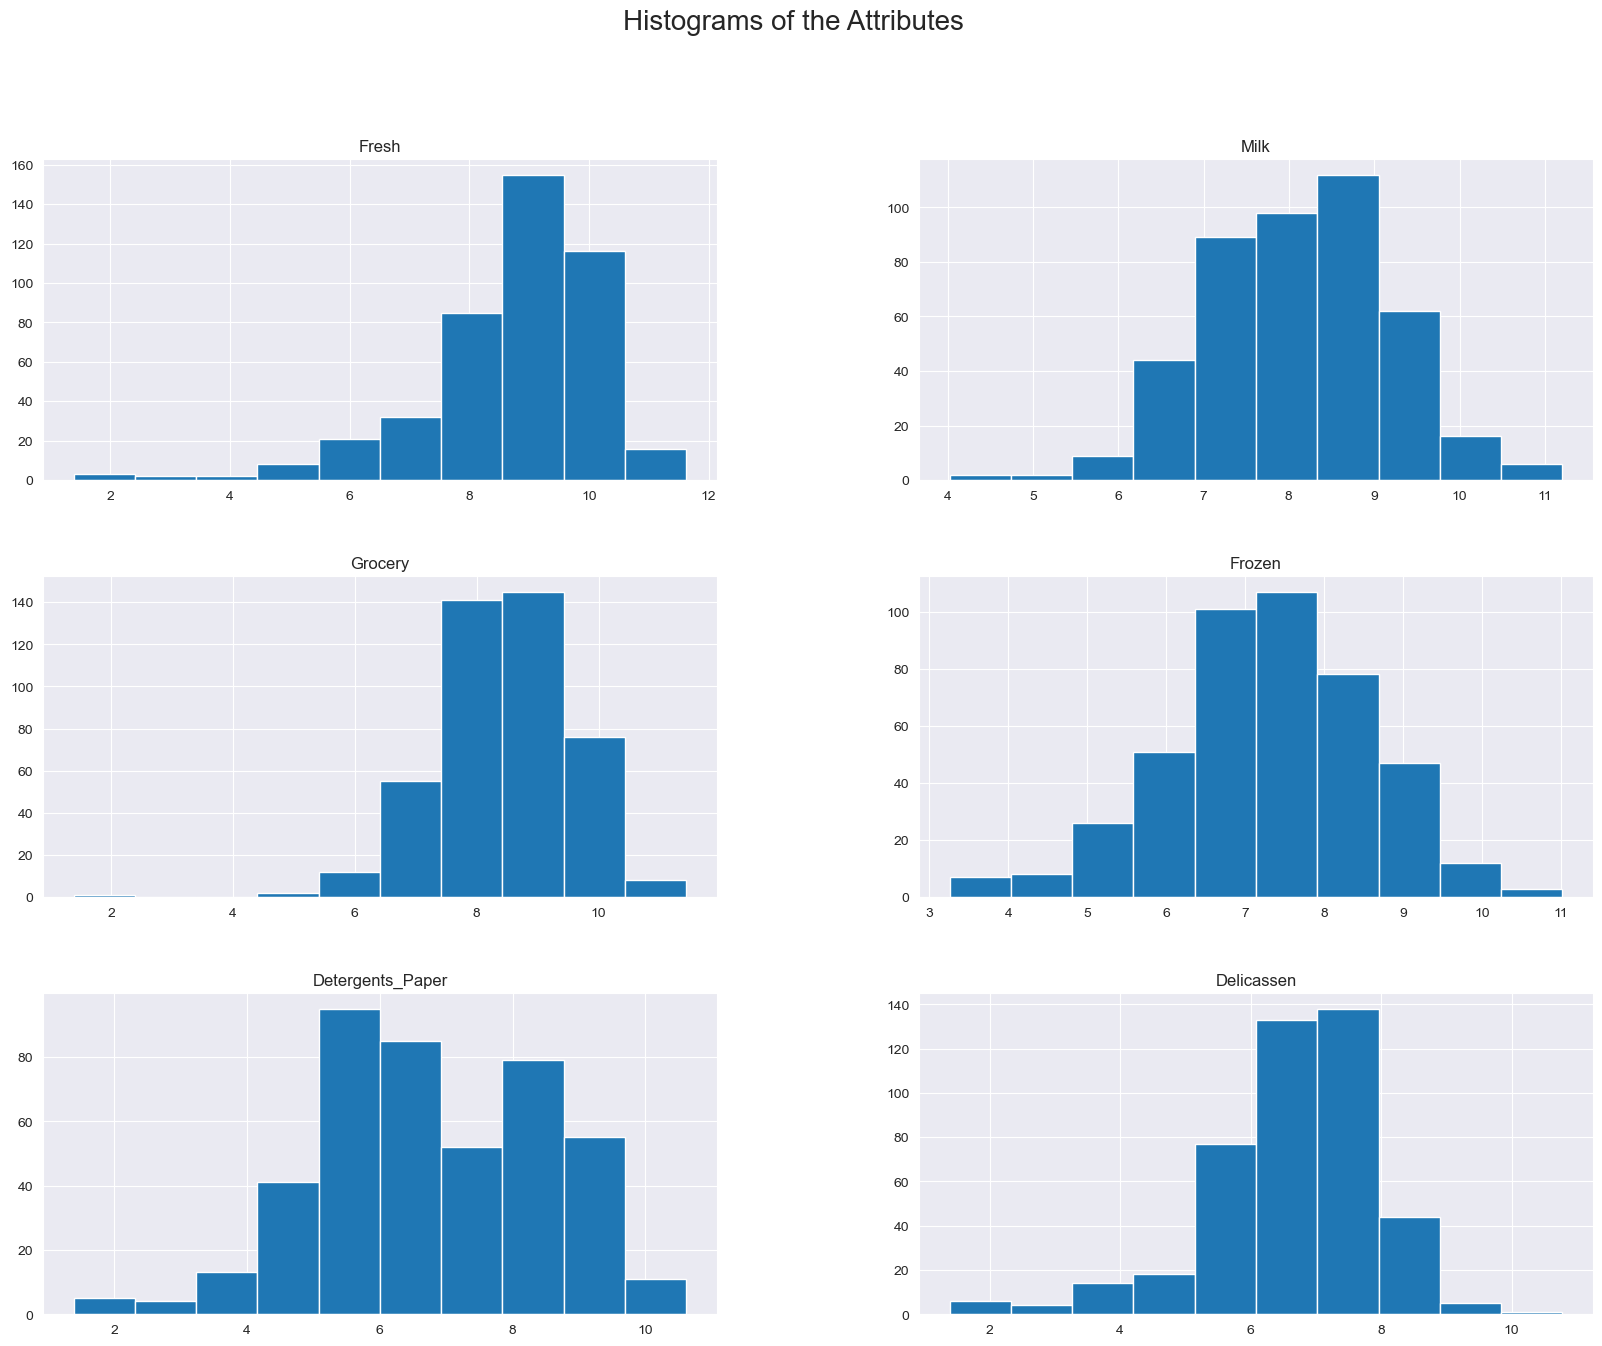

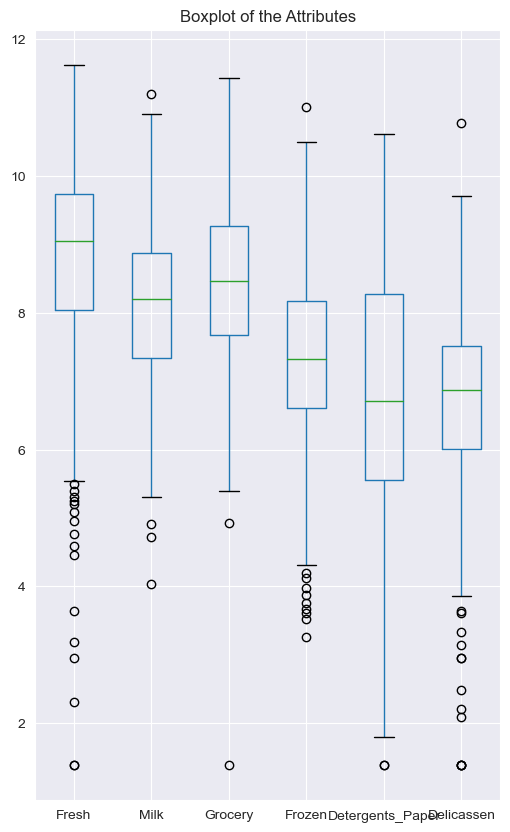

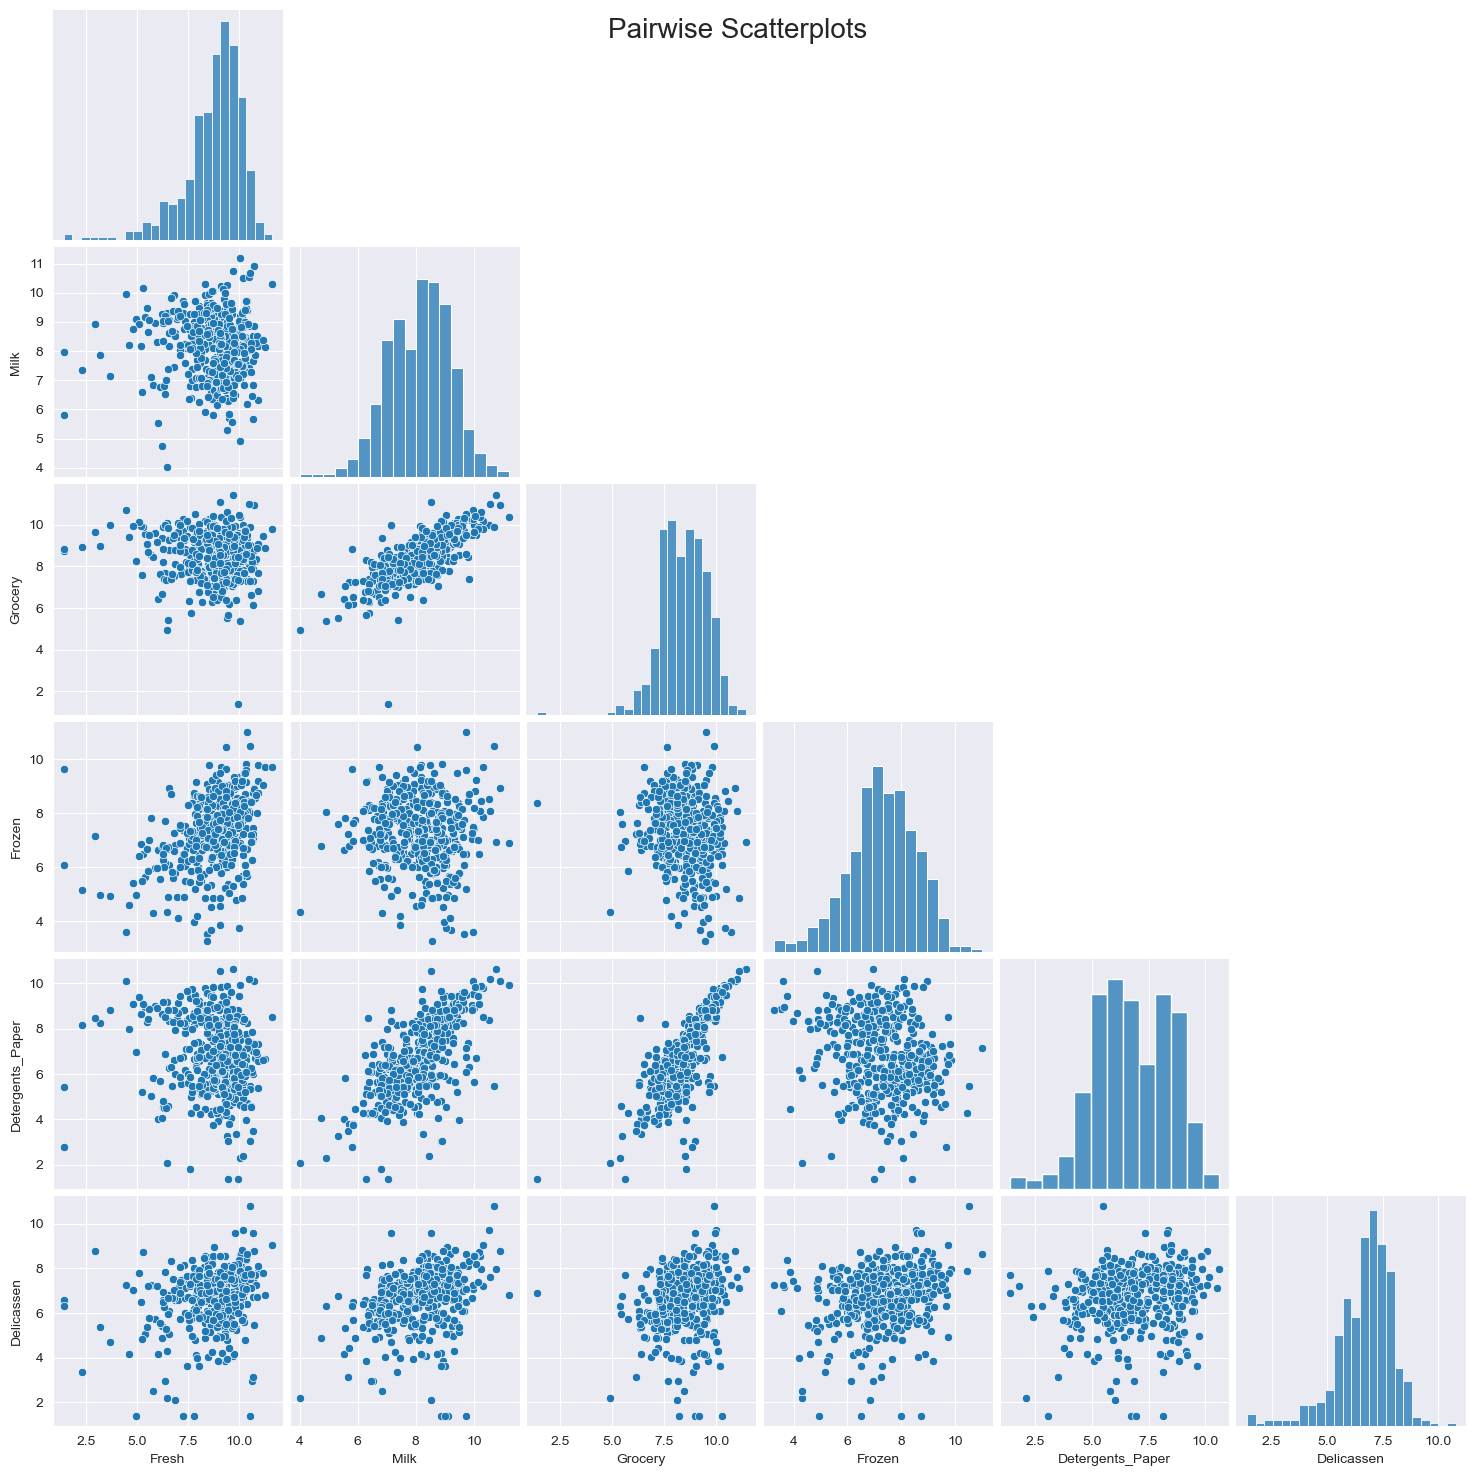

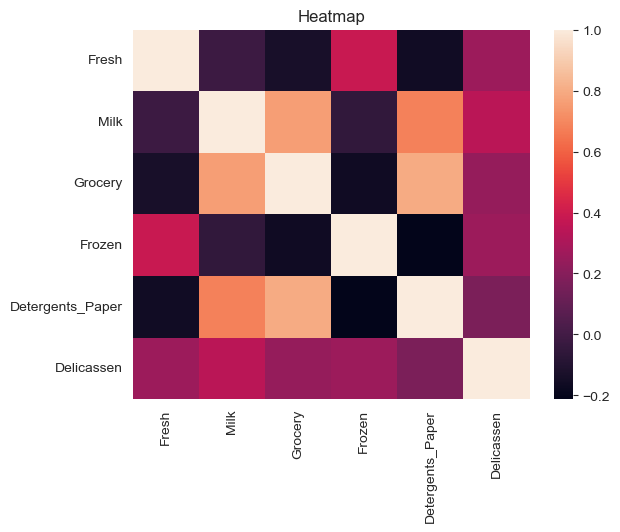

In [104]:
num_plot(df_num)

In [105]:
# Converting it into numerical tables (e.g. numpy arrays) -> Necessary?